In [4]:
#%pip install tensorflow

In [5]:
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
import sys
import matplotlib.pyplot as plt 
np.set_printoptions(threshold=sys.maxsize)

In [6]:
csv1 = pd.read_csv('sequence_execution_time.csv')
#csv1.head()

In [7]:
csv1.tail()

,sequence_identifier,read_sequence,quality,execution_time
3999995,@HWI-D00360:5:H814YADXX:1:1115:18756:14266 1:N...,ACTAATAAAGAAAAAAAGAGAGAAGAATCAAATAGACGCAATAAAA...,C@CFFFFFHHHHHJGEHHIJJJIJIIJJJJJIJJIFIIIIGIJJIJ...,341.792
3999996,@HWI-D00360:5:H814YADXX:1:1115:18805:14266 1:N...,ATAAATGAATAATAGGCGGTTTCTGACATCAGGAAGTTTAGACCGC...,CCCFFFFFGHHHHJJJJJJGIJHIJGIIJJIJJIIJHIJJIIJJJJ...,556.625
3999997,@HWI-D00360:5:H814YADXX:1:1115:18868:14278 1:N...,GTATGGAAATACCTGGATGTCCAGGCAGAAGTGTGCTACAGGGGCA...,@@CFFFFFHGHHHJIIIGIGHHAGGGIIBGG?ECCFFHIJJGEBDA...,8523.708
3999998,@HWI-D00360:5:H814YADXX:1:1115:18797:14322 1:N...,AACTCAGTAATTACTTTGATTTGGAGTCTTAATGCAATTTTACCCA...,CCCFFFFFHDHHHJJJJJJIJJJIJIHGHIIJJJJIJIJJJJJJJI...,880.708
3999999,@HWI-D00360:5:H814YADXX:1:1115:18971:14400 1:N...,GAAAATAGTTTCCCATTTGTTGCCACTGTTTTAAACTTACTGTTAT...,@@@FDFDBBDFFBFIGGGCFGFHHGIGEHIIIIEIIGE@GIIIGGI...,624.208


In [8]:
#csv1.describe()

In [9]:
#data = csv1.drop(['sequence_identifier','quality'], axis = 1)
data = csv1

In [10]:
data1 = data.drop(csv1.index[5000:]) #reduce dataset to 10% of original dataframe
#data.head()

In [11]:
data1.tail()

,sequence_identifier,read_sequence,quality,execution_time
4995,@HWI-D00360:5:H814YADXX:1:1101:18515:3754 1:N:...,CAGTGCTATTCACAATTGCAGAGAAATGGAATTAACCTAGATGCCC...,BCCFFFFFHGHHHJIJJJJIJJJIIIJJIIIHJJJJJJJJIJIJJJ...,700.041
4996,@HWI-D00360:5:H814YADXX:1:1101:18597:3869 1:N:...,ACCGGCCCGGGTTCTTTCTGTGTTCCACGTACCTATTAGTCCCACT...,CCCFFFFFGHHDHIJJJJJGIJJJJJJJIHIJJJIJJIIDHHIDII...,239.041
4997,@HWI-D00360:5:H814YADXX:1:1101:18687:3872 1:N:...,TCTGGACAAGCTGTATTTGAATCTGTGTGAAGTCAGGAGTGTGCAG...,CCCFFFFFHHHHHJJJJJJJJJJJJJJJJJJJJJJJJIJFHHIIII...,231.041
4998,@HWI-D00360:5:H814YADXX:1:1101:18640:3880 1:N:...,GATAACTGTATTTTTCAAAACTTAAATTTCAGAACATTTTATAGTC...,@@@FFFFFHHHHGJJJIGGGIIIJJIIIIJIIHJIIJJJJGIDHII...,787.500
4999,@HWI-D00360:5:H814YADXX:1:1101:18520:3923 1:N:...,TCACAAGGTTTTATATCAGCAACAGAGGACTAAGACCAAATATTTC...,CCCFFFFFDFHHHJJJJJJJJJJJJIJJJJJJJJJJJJJJJJJJJJ...,752.125


In [12]:
#from sklearn.preprocessing import LabelEncoder
#le =LabelEncoder()

#seq_trans = le.fit_transform(data1["read_sequence"])
#seq_ide_trans = le.fit_transform(data1["sequence_identifier"])
#quali_trans = le.fit_transform(data1["quality"])


In [13]:
#data1['seq_encoded']=seq_trans
#data1['seq_id_encoded']=seq_ide_trans
#data1['qual_encoded']=quali_trans
#data1.head()

In [14]:
reads = data1.drop(['sequence_identifier','quality'], axis =1)
reads

,read_sequence,execution_time
0,CTGGTCCTAACATCTGTTGACCATAGCCATATTTTTCAGAAAAGTC...,2295.125
1,TGGCTATGGGCTGCAATAATTCGTCTTTCTGAAAGGGCATTCAGCC...,674.000
2,ACTTTCTATCTCTATGGATTTAACCATTGTGGATATTTCATGTAAA...,757.209
3,ATCAAAAACATTCAAATGAAATCATCTTAAGTGCCAGAATTATAAA...,397.042
4,CAGGTTCCAATATTACAAATGCAAGGCCAGAAGGAGACTGCAAATG...,675.000
...,...,...
4995,CAGTGCTATTCACAATTGCAGAGAAATGGAATTAACCTAGATGCCC...,700.041
4996,ACCGGCCCGGGTTCTTTCTGTGTTCCACGTACCTATTAGTCCCACT...,239.041
4997,TCTGGACAAGCTGTATTTGAATCTGTGTGAAGTCAGGAGTGTGCAG...,231.041
4998,GATAACTGTATTTTTCAAAACTTAAATTTCAGAACATTTTATAGTC...,787.500


In [15]:
#Normalize data
reads['execution_time'] = np.log10(reads.execution_time)
reads

,read_sequence,execution_time
0,CTGGTCCTAACATCTGTTGACCATAGCCATATTTTTCAGAAAAGTC...,3.360806
1,TGGCTATGGGCTGCAATAATTCGTCTTTCTGAAAGGGCATTCAGCC...,2.828660
2,ACTTTCTATCTCTATGGATTTAACCATTGTGGATATTTCATGTAAA...,2.879216
3,ATCAAAAACATTCAAATGAAATCATCTTAAGTGCCAGAATTATAAA...,2.598836
4,CAGGTTCCAATATTACAAATGCAAGGCCAGAAGGAGACTGCAAATG...,2.829304
...,...,...
4995,CAGTGCTATTCACAATTGCAGAGAAATGGAATTAACCTAGATGCCC...,2.845123
4996,ACCGGCCCGGGTTCTTTCTGTGTTCCACGTACCTATTAGTCCCACT...,2.378472
4997,TCTGGACAAGCTGTATTTGAATCTGTGTGAAGTCAGGAGTGTGCAG...,2.363689
4998,GATAACTGTATTTTTCAAAACTTAAATTTCAGAACATTTTATAGTC...,2.896251


In [16]:
def Kmers_funct(seq, size=3): #148 characters/sequence  size = 6 better? Used 4 previously.[SIze = 9 gave a r_sq = 1 is this the best value for data = 250, train = 0.8 random = 42, ngaram 4,4]??
    #Performed much better with same settings and more data. used 1000. r_sq reduced to 0.9999999999999962
   return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]
#convert our training data sequences into short overlapping k-mers of length 6. Lets do that for each species of data we have using our Kmers_funct function.
reads['words'] = reads.apply(lambda x: Kmers_funct(x['read_sequence']), axis=1)
reads = reads.drop('read_sequence', axis=1)

In [17]:
human_texts = list(reads['words'])
for item in range(len(human_texts)):
   human_texts[item] = ' '.join(human_texts[item])
#separate labels
Y = reads.iloc[:, 0].values # y_human for human_dna

In [18]:
#from sklearn.feature_extraction.text import CountVectorizer
#cv = CountVectorizer(ngram_range = (4,4)) # initially (4,4) 
#: For ngram_range = (1,4) and fitting with all data rmsle = 0.3123797747684005, mse = 781905.5443143004, size = 9, data = 500, testsize = 0.8,random_state = 42
#: For ngram_range = (4,4) and fitting with all data rmsle = 0.27364484069740186, mse = 1041022.6402906085, size = 9, data = 500, testsize = 0.8,random_state = 42
#X = cv.fit_transform(human_texts)
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer(ngram_range = (4,4))
X = tfid.fit_transform(human_texts)
#print(X)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state = 1) 
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (4000, 4116)
X_test (1000, 4116)
y_train (4000,)
y_test (1000,)


In [20]:
Xnew = X_train.todense()
Xnew.shape

(4000, 4116)

In [21]:
X_train_original = np.expand_dims(Xnew, 2)

In [22]:
#X_train_original = np.expand_dims(X_train, 2)
#X_train_original = X_train.reshape(len(X_train), 1, X_train.shape[1])
#X_train_original = X_train.reshape((X_train.getnnz()),X_train.shape[1],1)
#X_train_original = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
#X_train_original = X_train.reshape((X_train.todense()),X_train.shape[1],1)
#X_train_original = X_train.reshape((X_train.todense()),X_train.shape[1],1)

In [23]:
X_train_original.shape

(4000, 4116, 1)

In [24]:
#XX_T = X_train_original **2  # squared, appears some values are negative
#XX_T.shape

In [25]:
import tensorflow as tf
from keras.optimizers import SGD
from keras.layers import Conv1D, Dense, MaxPooling1D, Flatten, Dropout
#from keras.layers import *
from keras.models import Sequential
from tensorflow.keras.layers import LSTM

2022-12-06 14:20:24.268736: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-06 14:20:25.049998: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-06 14:20:25.050029: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-06 14:20:25.141554: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-06 14:20:26.587862: W tensorflow/stream_executor/platform/de

In [26]:
model = Sequential()
model.add(LSTM(64, return_sequences = True, input_shape = (X_train_original.shape[1:]), activation='relu')) #original filter size = 64 # 2 appears to avoid nan values
#model.add(Dropout(0.5))
#model.add(LSTM(128, activation = 'relu', return_sequences = True)) #original filter size 128 
#model.add(Conv1D(2, kernel_size= 2,padding = 'same',activation = 'relu')) #updated inputshape# changed again from 32 to 256
#model.add(Dropout(0.5))
model.add(Flatten()) # removing flatten introducing nan values and changes shape of output

model.add(Dense(1))

2022-12-06 14:20:28.022899: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-06 14:20:28.023795: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-06 14:20:28.023816: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (tdt4173-08): /proc/driver/nvidia/version does not exist
2022-12-06 14:20:28.024845: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
#X_train = tf.reshape(X_train,shape = [-1,250,3])
#y_train = tf.reshape(y_train,shape = [-1,250,1])


In [28]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4116, 64)          16896     
                                                                 
 flatten (Flatten)           (None, 263424)            0         
                                                                 
 dense (Dense)               (None, 1)                 263425    
                                                                 
Total params: 280,321
Trainable params: 280,321
Non-trainable params: 0
_________________________________________________________________


In [29]:
#X_train = tf.reshape(X_train,shape = [-1,375,3])
#y_train = tf.reshape(y_train,shape = [-1,125,1])

In [30]:
#y_train = np.expand_dims(y_train, 1) # Take off , see what happens

In [31]:
#input_ids = input_ids.toarray()

In [32]:
Xtstnew = X_test.todense()
X_test_n = np.expand_dims(Xtstnew, 2)

In [36]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

In [37]:
history = model.fit(X_train_original, y_train, 
                    epochs=1000, verbose=1, batch_size=512, validation_split = 0.2,callbacks = [callback] ) #changed batch_size to 2 intitally 50 #validation_data = (X_test_n,y_test)

Epoch 1/1000
7/7 [==============================] - 32s 5s/step - loss: 0.2611 - accuracy: 0.0000e+00 - val_loss: 0.2206 - val_accuracy: 0.0000e+00
Epoch 2/1000
7/7 [==============================] - 32s 5s/step - loss: 0.2301 - accuracy: 0.0000e+00 - val_loss: 0.2202 - val_accuracy: 0.0000e+00
Epoch 3/1000
7/7 [==============================] - 33s 5s/step - loss: 0.2155 - accuracy: 0.0000e+00 - val_loss: 0.2194 - val_accuracy: 0.0000e+00
Epoch 4/1000
7/7 [==============================] - 32s 5s/step - loss: 0.2095 - accuracy: 0.0000e+00 - val_loss: 0.2191 - val_accuracy: 0.0000e+00
Epoch 5/1000
7/7 [==============================] - 33s 5s/step - loss: 0.2071 - accuracy: 0.0000e+00 - val_loss: 0.2190 - val_accuracy: 0.0000e+00
Epoch 6/1000
7/7 [==============================] - 32s 5s/step - loss: 0.2057 - accuracy: 0.0000e+00 - val_loss: 0.2187 - val_accuracy: 0.0000e+00
Epoch 7/1000
7/7 [==============================] - 33s 5s/step - loss: 0.2058 - accuracy: 0.0000e+00 - val_loss

In [38]:
#Xtstnew = X_test.todense()
#X_test_n = np.expand_dims(Xtstnew, 2)

In [39]:
ypred = model.predict(X_test_n)

32/32 [==============================] - 9s 269ms/step


In [40]:
ypred.shape

(1000, 1)

In [41]:
#print(ypred)

In [42]:
ypred_train = model.predict(X_train_original)

125/125 [==============================] - 34s 274ms/step


In [43]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train,ypred_train)
r2_train

0.48021338359892196

In [44]:
r2_test = r2_score (y_test,ypred)
r2_test 

0.23367853634516023

In [45]:
from sklearn.metrics import mean_squared_error
print("MSE: %.4f" % mean_squared_error(y_test, ypred))

MSE: 0.1524


In [46]:
from sklearn.metrics import mean_squared_log_error
rmsle = mean_squared_log_error(y_test,ypred)**0.5
rmsle

0.09499954637478338

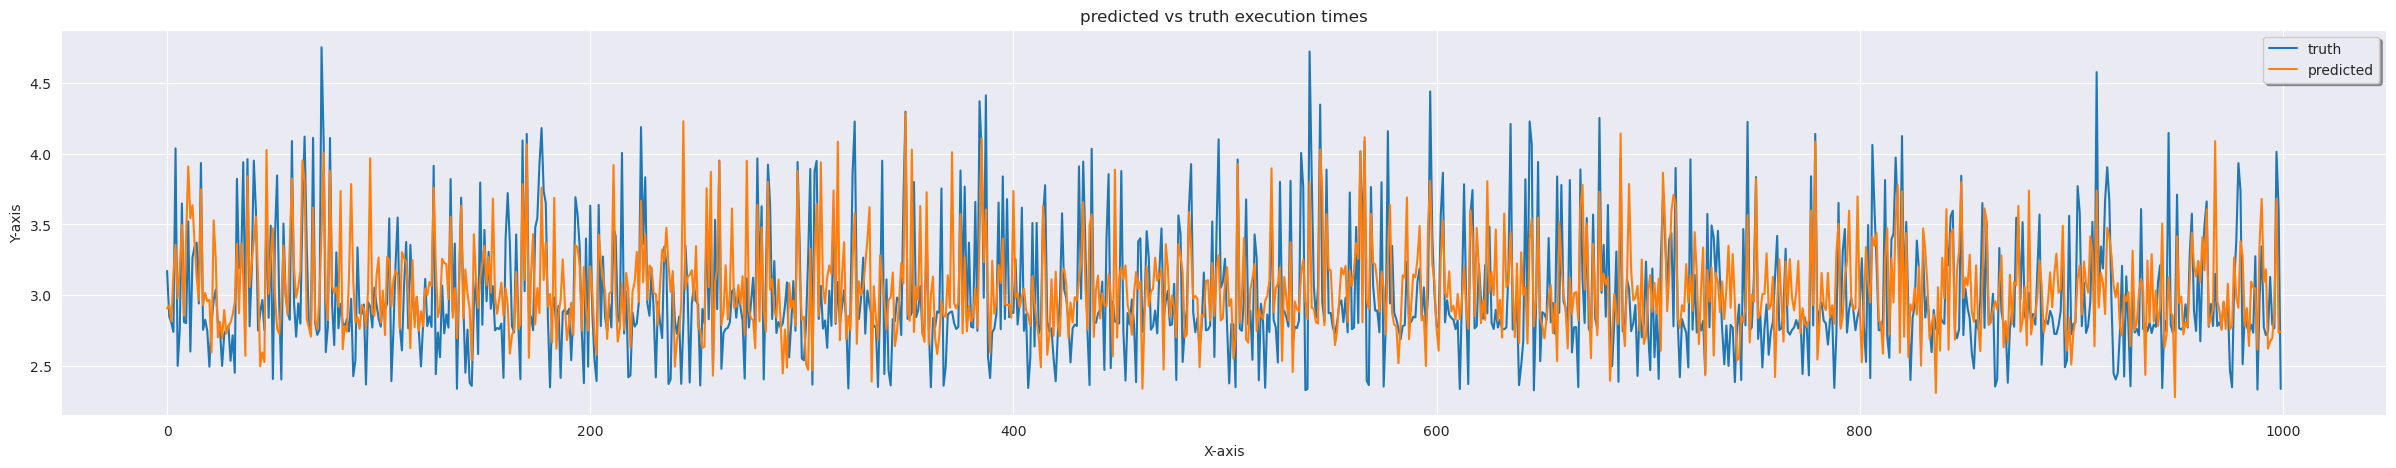

In [47]:
x_ax = range(len(y_test))
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(5)
plt.plot(x_ax, y_test, label="truth")
plt.plot(x_ax, ypred, label="predicted")
plt.title("predicted vs truth execution times")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [48]:
y_pred_non_log = 10**(ypred)
y_test_non_log = 10**(y_test)

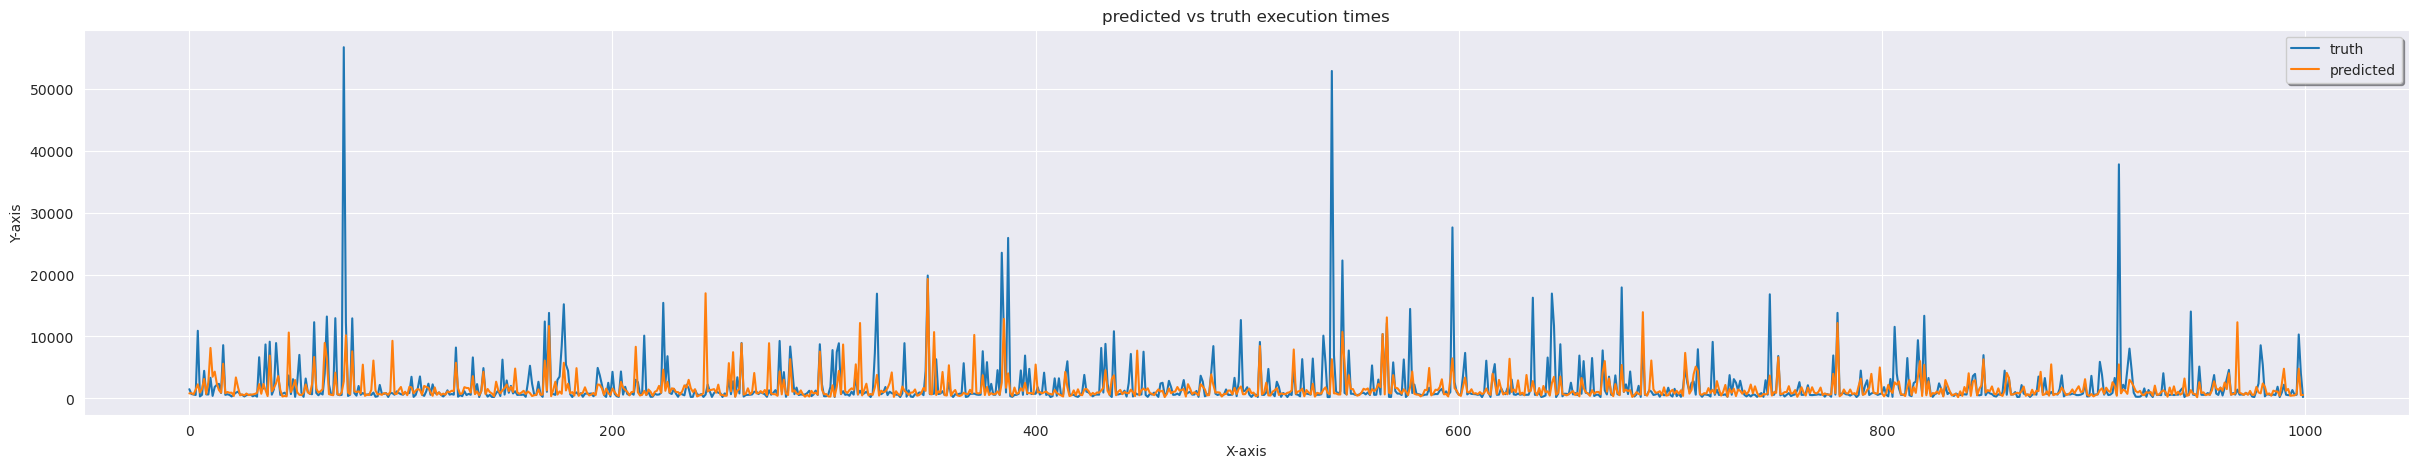

In [49]:
x_ax = range(len(y_test_non_log))
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(5)
plt.plot(x_ax, y_test_non_log, label="truth")
plt.plot(x_ax, y_pred_non_log, label="predicted")
plt.title("predicted vs truth execution times")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

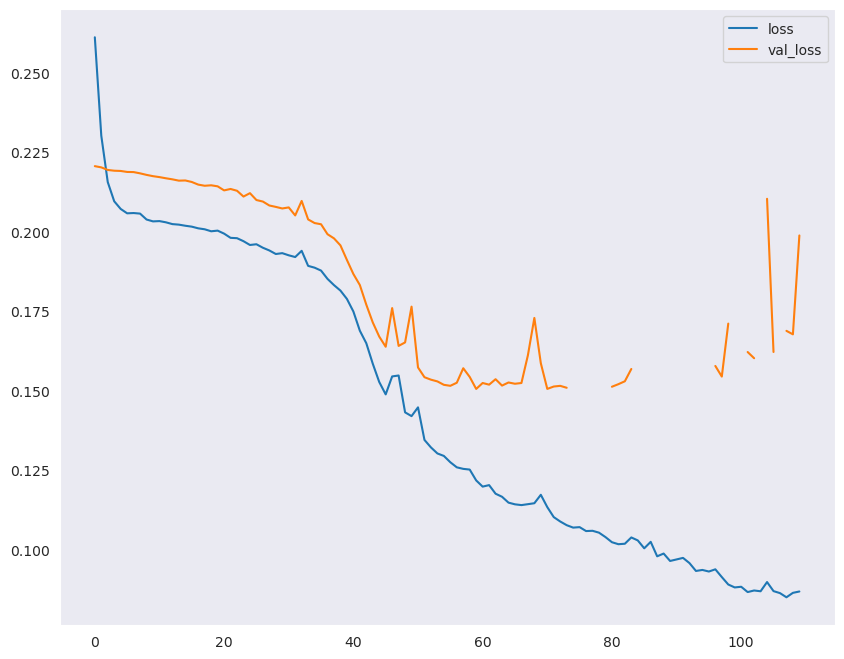

In [50]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
#plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
#plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()